In [3]:
#Importing Libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [4]:
#Reading Dataset 
data=pd.read_csv(r"C:\Users\kcrkr\Desktop\Data Science(Corizo)\Minor_Project(Stock_Price_Prediction)\Stock_Price_data_set.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [5]:
#Checking Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


<AxesSubplot: xlabel='Date'>

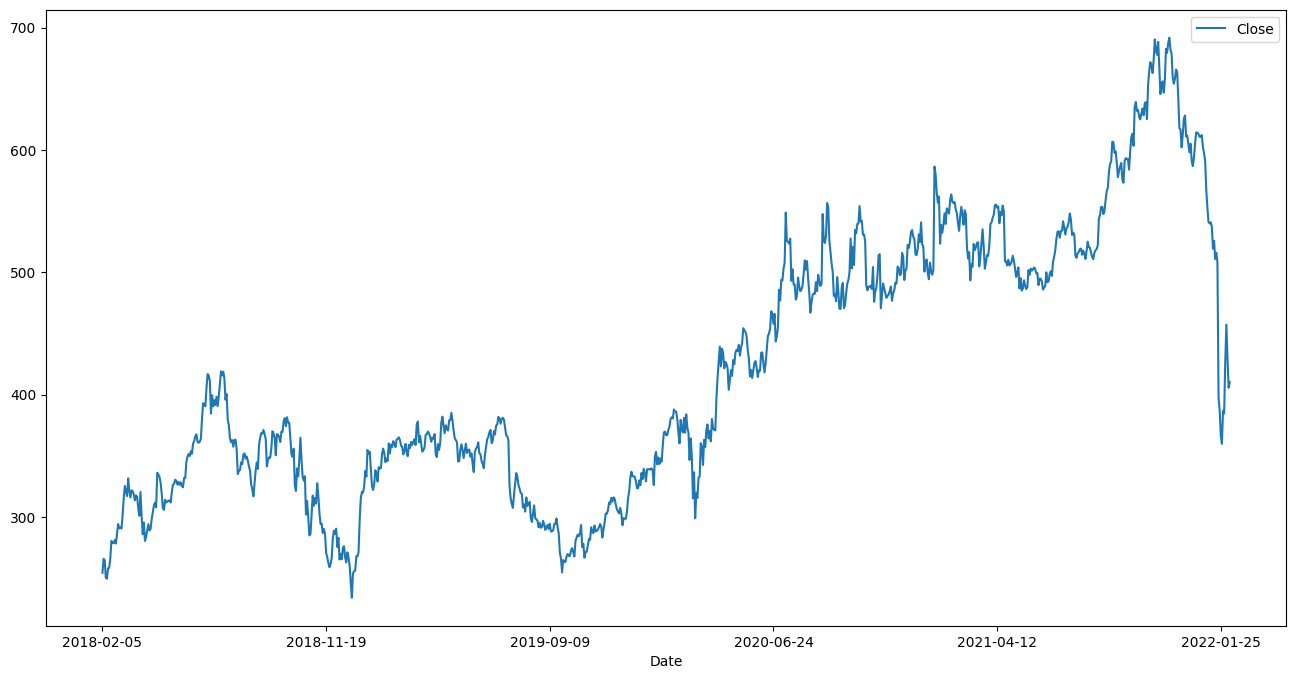

In [6]:
#Checking Graph Between Date and Close for given dataset
data.plot(x='Date',y='Close',figsize=(16,8))

In [7]:
#Selecting only Close column from data and reading taking 80% as length to train
data1=data.filter(['Close'])
print(data1)
dataset=data1.values
train_data_len=math.ceil(len(dataset)*.8)

           Close
0     254.259995
1     265.720001
2     264.559998
3     250.100006
4     249.470001
...          ...
1004  427.140015
1005  457.130005
1006  429.480011
1007  405.600006
1008  410.170013

[1009 rows x 1 columns]


In [18]:
#Taking train data and appending into x_train and y_train list
train_data=dataset[0:train_data_len,:]

x_train=[]
y_train=[]

for i in range(60,train_data_len):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])    

In [19]:
#Converting to array
x_train,y_train=np.array(x_train),np.array(y_train)

In [20]:
#Taking test data and appending into x_test list
test_data=dataset[train_data_len-60:,:]

x_test=[]
y_test=dataset[train_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [21]:
#Converting to array
x_test=np.array(x_test)

In [22]:
#Creating a model and predicting values
model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred=np.array(y_pred)

In [23]:
#Taking values into different variables to plot graph 
train=data[:train_data_len]
valid=data[train_data_len:]
valid['Pred']=y_pred

C:\Users\kcrkr\AppData\Local\Temp\ipykernel_13020\1620103739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Pred']=y_pred


<AxesSubplot: title={'center': 'Predicted Values(2021-2022)'}, xlabel='Date'>

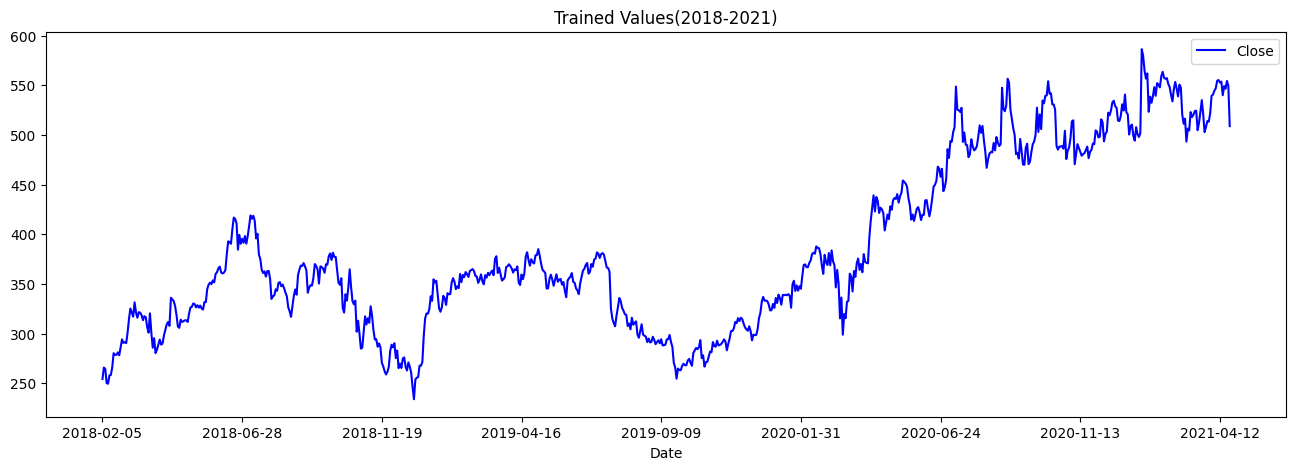

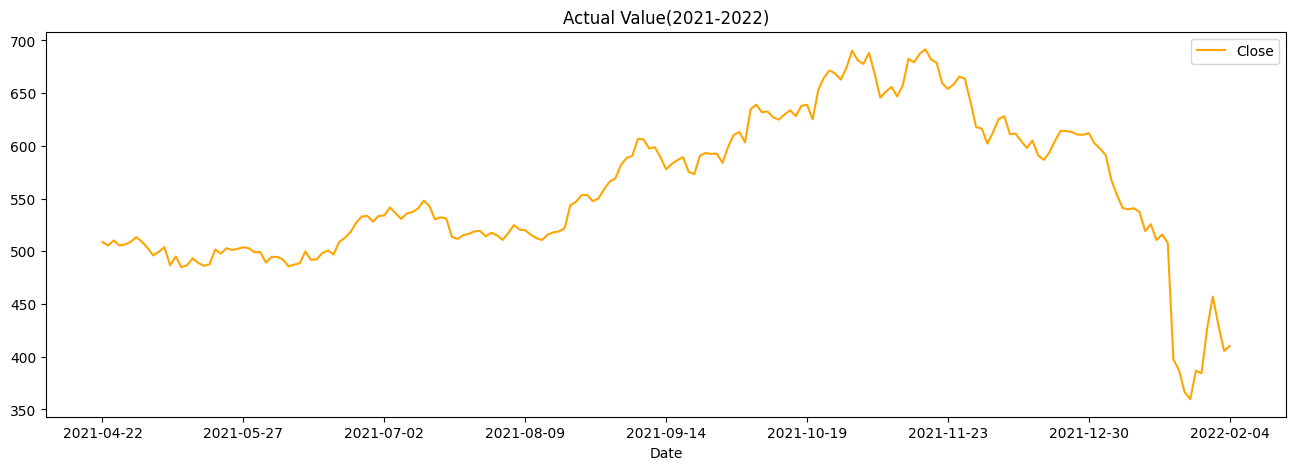

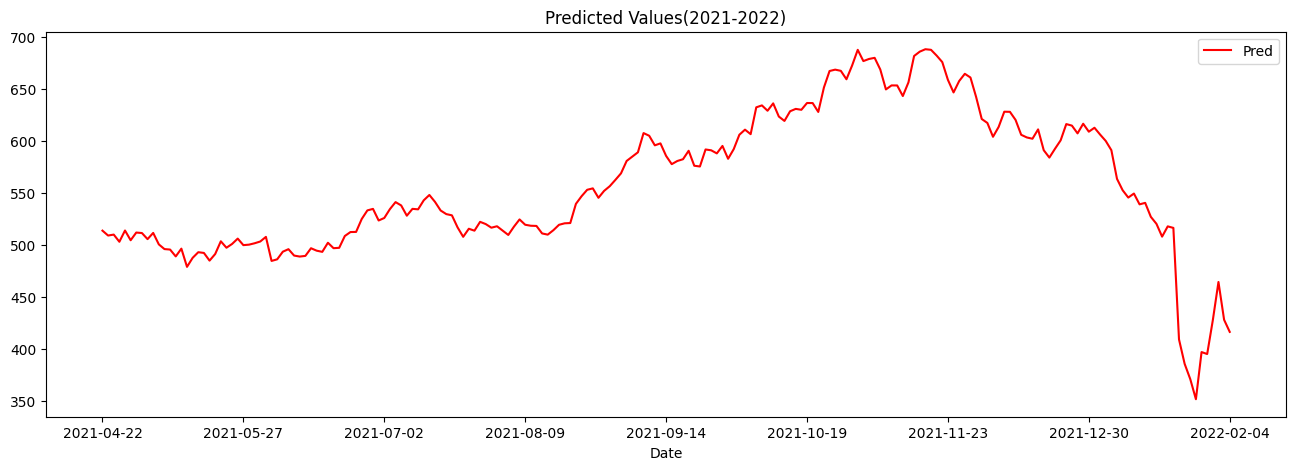

In [24]:
#Plotting 3 graphs for trained values,actual values,predicted values
train.plot(x='Date',y='Close',figsize=(16,5),title="Trained Values(2018-2021)",color='blue')
valid.plot(x='Date',y='Close',figsize=(16,5),title="Actual Value(2021-2022)",color='orange')
valid.plot(x='Date',y='Pred',figsize=(16,5),title="Predicted Values(2021-2022)",color='red')